In [3]:
import pandas as pd

df = pd.read_csv("C:\\Users\\tiyas\\Desktop\\My learning (Data Science)\\Projects\\TCGA-BRCA_Treatment_Prediction\\data_preprocessed.csv")
df

,age_at_diagnosis,ajcc_pathologic_stage,treatment_or_therapy,cancer_category_Highly Aggressive & Rare,cancer_category_Invasive Ductal Carcinoma (IDC),cancer_category_Invasive Lobular Carcinoma (ILC),cancer_category_Rare Subtypes,cancer_category_Slow-Growing & Favorable Prognosis,diagnosis_method_category_General Biopsy,diagnosis_method_category_Needle Biopsy,diagnosis_method_category_Surgical Diagnosis,treatment_category_Chemotherapy,treatment_category_Hormone Therapy,treatment_category_Radiation Therapy,treatment_category_Surgery & Ancillary Procedures,treatment_category_Targeted & Immunotherapy
0,0.539683,1,0,False,True,False,False,False,False,False,True,False,False,True,False,False
1,0.539683,1,1,False,True,False,False,False,False,False,True,False,True,False,False,False
2,0.539683,1,1,False,True,False,False,False,False,False,True,False,False,False,True,False
3,0.698413,0,1,False,False,False,False,False,False,True,False,False,False,False,True,False
4,0.365079,5,1,False,False,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,0.698413,4,1,False,False,True,False,False,False,False,True,False,True,False,False,False
4412,0.507937,5,1,False,True,False,False,False,False,False,True,True,False,False,False,False
4413,0.507937,5,0,False,True,False,False,False,False,False,True,False,False,True,False,False
4414,0.507937,5,1,False,True,False,False,False,False,False,True,True,False,False,False,False


## Data Visualization

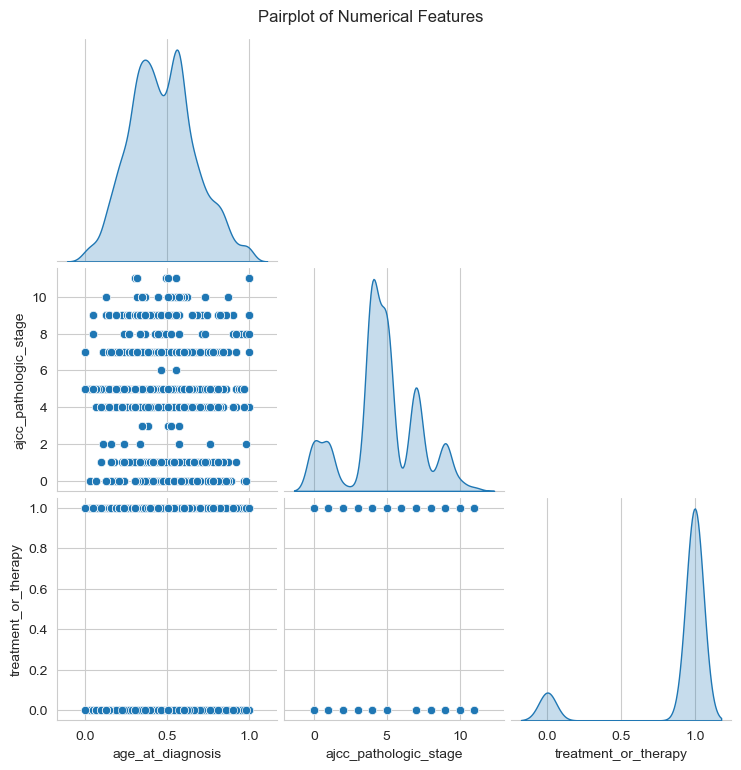

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Pairplot (only for numerical variables to avoid clutter)
numeric_cols = df.select_dtypes(include=['number']).columns
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

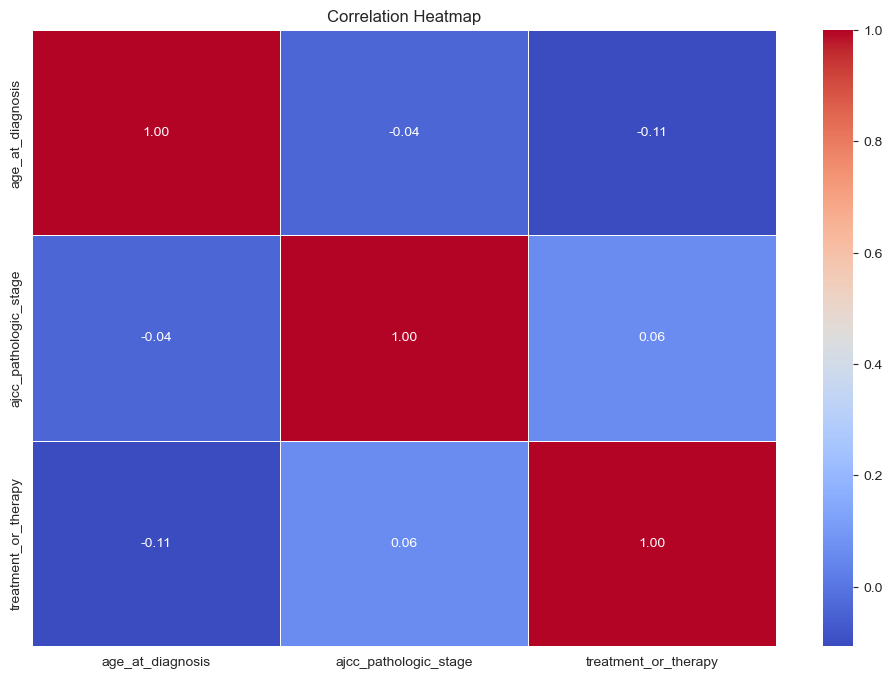

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

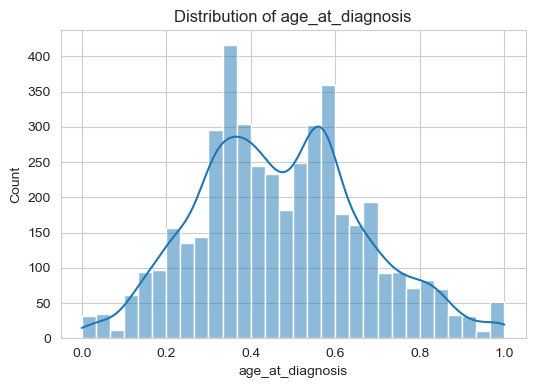

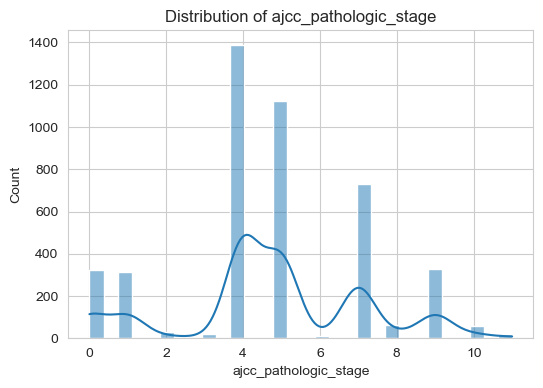

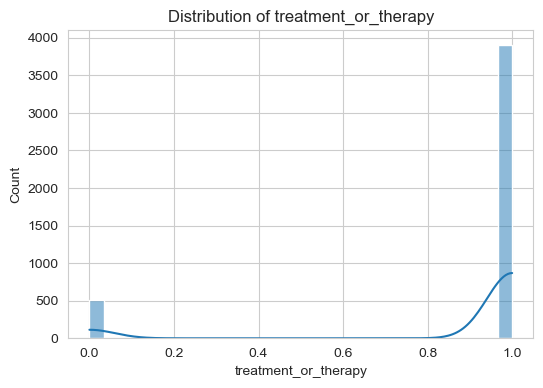

In [7]:
# Distribution Plots for Key Numerical Features
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

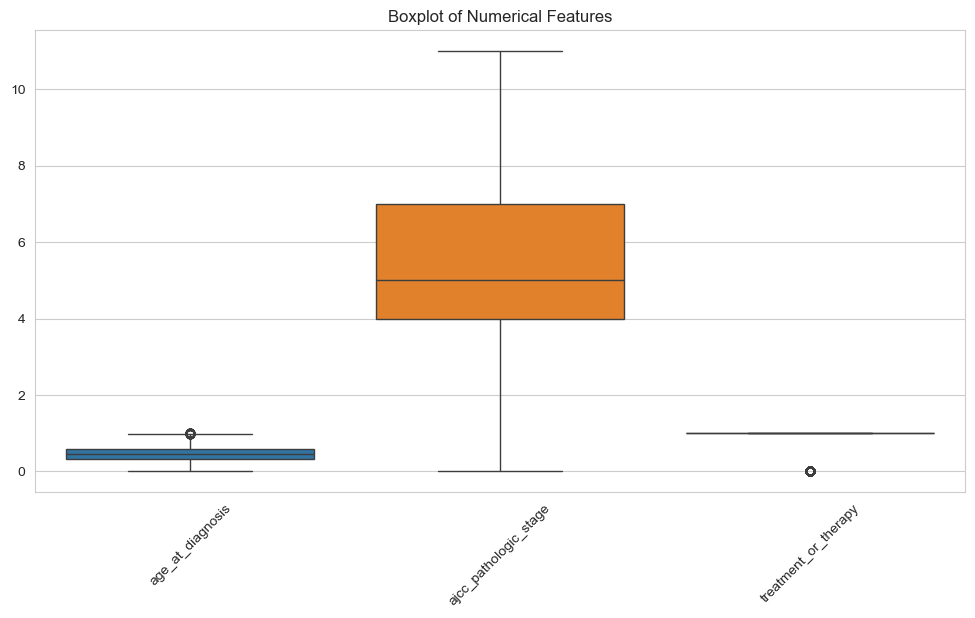

In [8]:
# Boxplots to Detect Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


Explained Variance by Principal Components: [0.15696814 0.11147783]


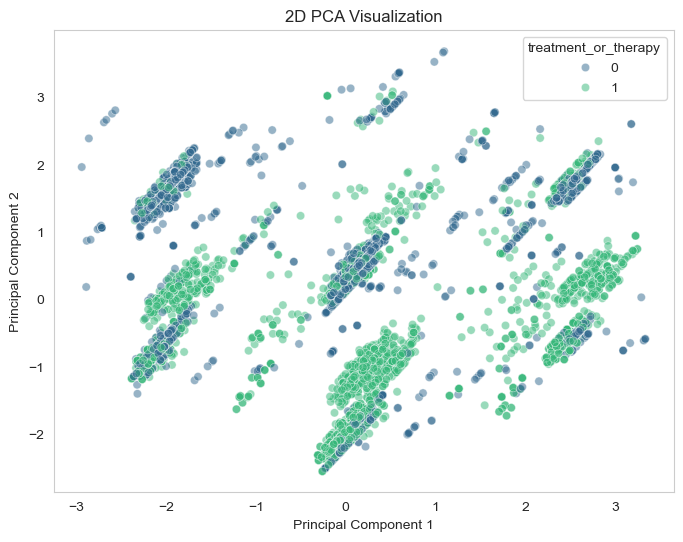

Mean CV Accuracy: 0.8732
Test Accuracy: 0.9040
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       781
           1       0.90      0.91      0.90       781

    accuracy                           0.90      1562
   macro avg       0.90      0.90      0.90      1562
weighted avg       0.90      0.90      0.90      1562



In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Extract features and target
X = df.drop('treatment_or_therapy', axis='columns')
y = df['treatment_or_therapy']

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA after SMOTE
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Convert PCA output to a DataFrame for visualization
pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_df['treatment_or_therapy'] = y_train.values

# Display explained variance
print("\nExplained Variance by Principal Components:", pca.explained_variance_ratio_)

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='treatment_or_therapy', data=pca_df, palette='viridis', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization")
plt.grid()
plt.show()

# Applying classification model on PCA-transformed data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

# Cross-validation
scores = cross_val_score(model, X_train_pca, y_train, cv=5)
print(f"Mean CV Accuracy: {scores.mean():.4f}")

# Predictions and evaluation
y_pred_pca = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_pca))

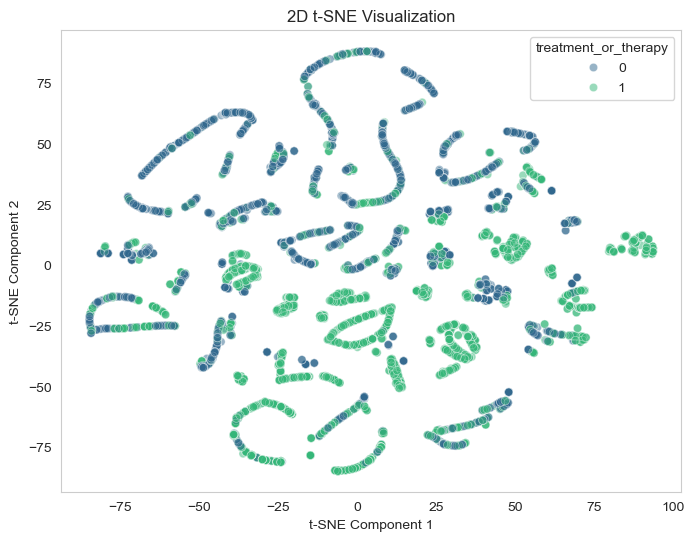

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Extract features and target
X = df.drop('treatment_or_therapy', axis='columns')
y = df['treatment_or_therapy']

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
tsne_df = pd.DataFrame(X_train_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['treatment_or_therapy'] = y_train.values

# Scatter plot of t-SNE components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='treatment_or_therapy', data=tsne_df, palette='viridis', alpha=0.5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("2D t-SNE Visualization")
plt.grid()
plt.show()